In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, 1,  imsize , imsize)
    x_test = x_test.reshape(-1, 1, imsize , imsize)
    return x_train, y_train, x_test, y_test

In [66]:
num_classes = 10
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

# Task1 
Make a mean image of each class

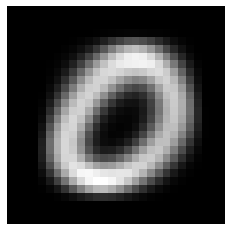

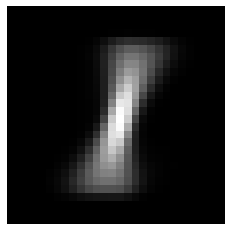

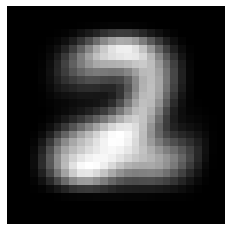

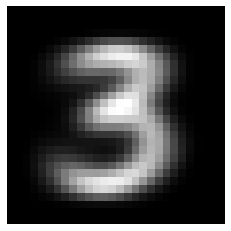

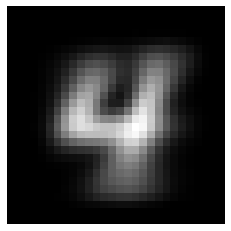

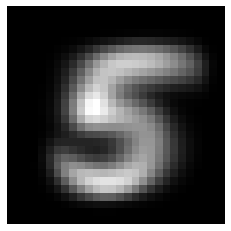

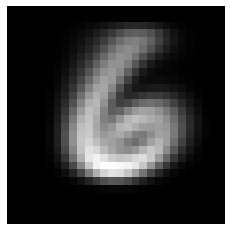

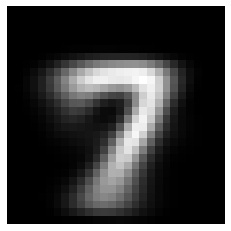

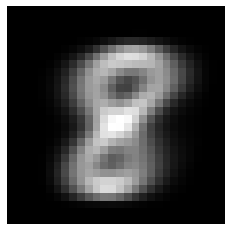

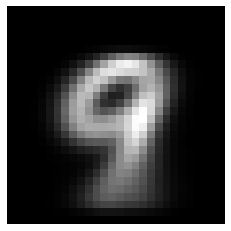

In [67]:
for i in range(num_classes):
    indx = np.flatnonzero(y_train == i)
    mean_image = x_train[indx].mean(axis=0)
    fig, ax = plt.subplots(1, 1)
    ax.imshow(mean_image[0], cmap='gray')
    ax.axis('off')

# Task2
Find the most similar images using Monte-Carlo method

In [68]:
from skimage.metrics import structural_similarity # for images comparing
import tqdm

In [69]:
x_train = x_train[:6000:]
x_train.shape

(6000, 1, 28, 28)

In [133]:
max_similarity = structural_similarity(x_train[0][0], x_train[1][0])
experiments = 10
experiment_size = int(x_train.shape[0] / 50)
result_images = (x_train[0][0], x_train[1][0])
similarity_history = []
#Monte Carlo:
for _ in range(experiments):
    rand_indx = np.random.choice(x_train.shape[0], experiment_size, replace=False)
    #for j, x in enumerate(rand_indx):
    #    print(j, x)
    buf_subspace = x_train[rand_indx]
    buf_simiarity = 0
    buf_images_indx = (0,0)
    
    for i in tqdm.tqdm(range(buf_subspace.shape[0])):
        for j in range(i+1, buf_subspace.shape[0]):
            if (buf_simiarity < structural_similarity(buf_subspace[i][0], buf_subspace[j][0])):
                buf_simiarity = structural_similarity(buf_subspace[i][0], buf_subspace[j][0])
                buf_images_indx = (i, j)
                #print(i, j)
                
    #print(buf_images_indx)
    #for i, x in enumerate(buf_subspace):
    #    fig, ax = plt.subplots(1,1)
    #    ax.imshow(x[0])
    #    ax.set_title(f"{i}")
    if (buf_simiarity > max_similarity):
        result_images = (buf_subspace[buf_images_indx[0]], buf_subspace[buf_images_indx[1]])
        max_similarity = buf_simiarity
    similarity_history.append(max_similarity)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:03<00:00, 38.59it/s]


0.9288076041649115


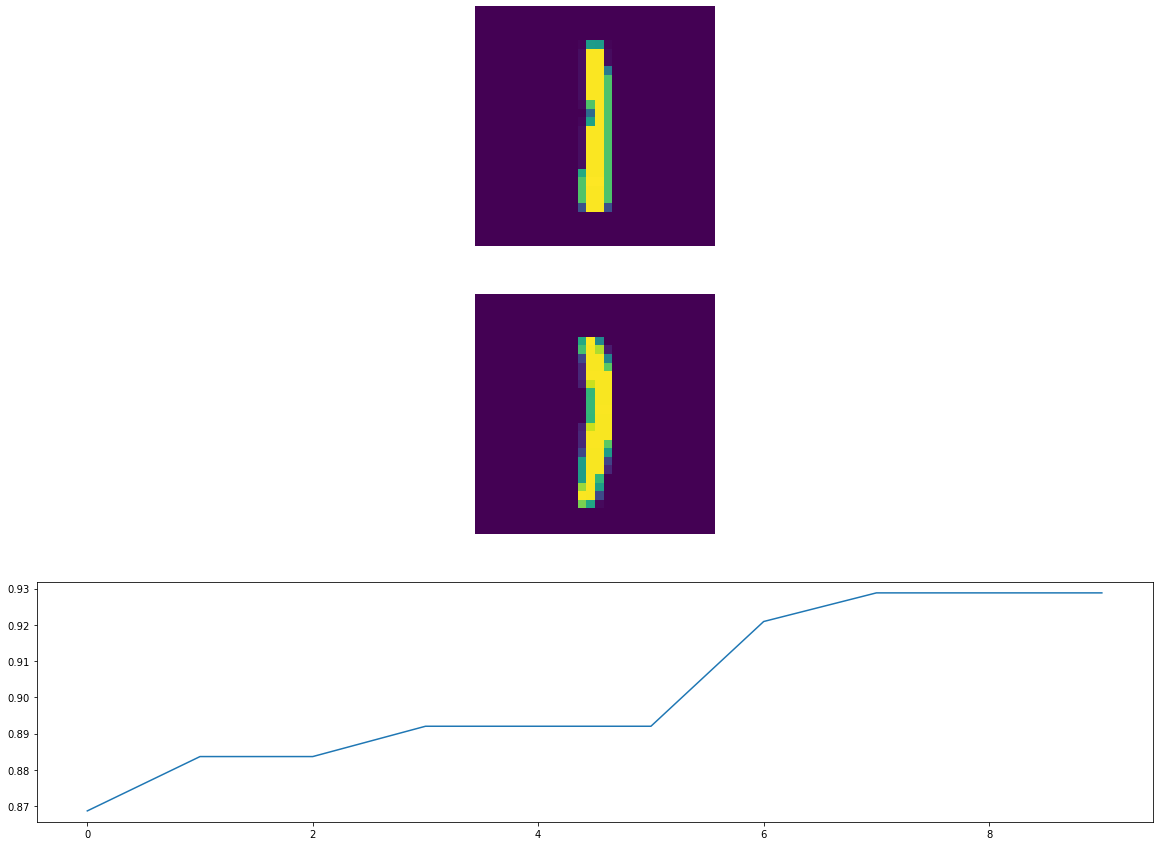

In [139]:
print(max_similarity)
fig, ax = plt.subplots(3,1, figsize=(20,15))
for i in range(2):
    ax[i].imshow(result_images[i][0])
    ax[i].axis('off')
ax[2].plot(similarity_history)

In [135]:
structural_similarity(result_images[0][0], result_images[1][0])

0.9288076041649115

[]